Simulation of moving bar with two cell types and delayed feedback
July 28, 2020 created by CKC
based on NF_MB_02 but with a smooth moving bar by using a stimulation with continuous position

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
%matplotlib inline

In [2]:
def K(x,s):
    return(np.exp(-(x/s)**2))

In [3]:
klen = 80
hw = 30
xx = np.arange(klen)

sigma_c = 30
sigma_h = 40

kcxs = K(xx,sigma_c)
khxs = K(xx,sigma_h)
KH = np.zeros(klen*2-1)
KC = np.zeros(klen*2-1)
tmp = khxs[::-1]
KH[0:klen]= tmp[0:klen]
KH[klen:2*klen]=khxs[1:klen]

tmp = kcxs[::-1]
KC[0:klen]= tmp[0:klen]
KC[klen:2*klen]=kcxs[1:klen]
CS=KC-0.3*KH

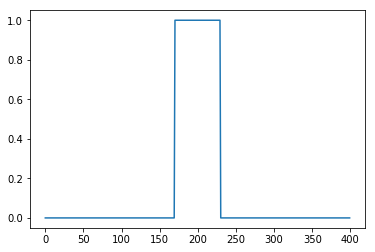

In [4]:
xlen = 400 #spatial extend of simulation
i0 = 200
s = np.zeros(xlen)
s[i0-hw:i0+hw] = 1
plt.plot(s)

In [5]:
# Guassian function with mean x0 and standard deviation sigma
def G(x,x0,sigma):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = np.exp(-((x[i]-x0)/sigma)**2)
    return(y)

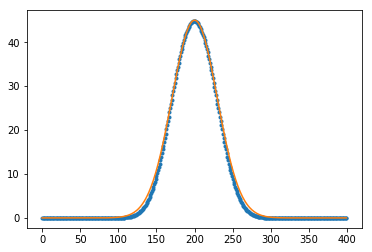

In [6]:
# macthing with Gussian profile with convoluted result

r = np.convolve(s,KC,'same')
plt.plot(r,'.')
tempx = np.arange(xlen)
tempy = 45*G(tempx,i0,sigma_c*1.4) # this form will be used for stimulation
plt.plot(tempy)

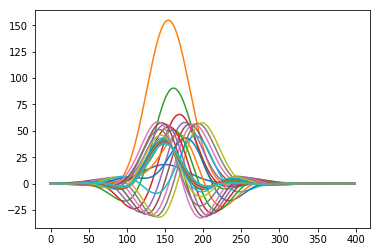

In [23]:
dt = 0.001

alpha = 80
beta = 2

k = 400
g = 1/20

pos_0 = 150
nstep = 1500
v = 100 # moving bar velocity
#v = 0

y = np.zeros(xlen) # cone cell output
z = np.zeros(xlen) # horizontal cell output


speak = np.zeros(nstep)
rpeak = np.zeros(nstep)

stm = []
rsp = []
zts = []
tmp = []

for i in range(nstep):
    #s = np.zeros(xlen)            # stimulation array
    #d = int(v*i)                  # distance travelled by the moving bar
    #speak[i]= i0+d                # peak position of stimulatino
    #s[i0+d-hw:i0+hw+d] = 1        # stimualation turned on for the bar position
    #rs = np.convolve(s,KC,'same') # stimulation (s) convoluted with cone receptive field KC
    if i < 400:
        pos = pos_0 + v*dt*i
    if i > 400 and i <800:
        pos = pos - v*dt
    speak[i] = pos
    rs =  45*G(tempx,pos,sigma_c*1.4)
    ry = np.convolve(y,KH,'same') # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    
    for j in range(xlen):
        dyj =(-alpha*y[j]+k*(rs[j]-z[j]))*dt
        dzj =(-beta*z[j]+g*ry[j])*dt
        y[j] = y[j]+dyj
        z[j] = z[j]+dzj
    maxpos = np.argmax(y)
    rpeak[i]= maxpos
    
    stm.append(rs.copy())
    rsp.append(y.copy())
    zts.append(z.copy())
    
    if i%50 == 0:
        #plt.plot(y[maxpos-50:maxpos+50])
        plt.plot(y)
        tmp.append(y)
        #plt.plot(rs/7)

(-50, 350)

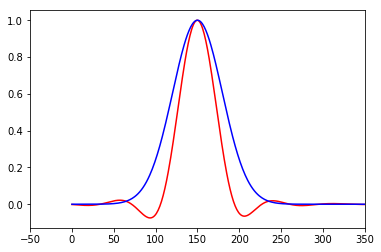

In [24]:
plt.plot(y/np.max(y),'r')
plt.plot(rs/np.max(rs),'b')
#plt.plot(z)
plt.xlim([maxpos-200,maxpos+200])

In [25]:
# activation function
def A(x,theta):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]- theta>0:
            y[i]= x[i]-theta
    return(y)

(50, 250)

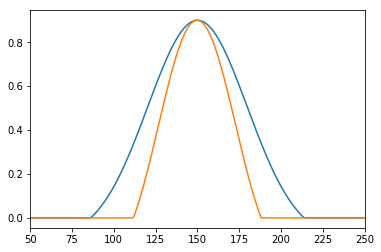

In [26]:
# shown with activatin function
rrs = rs/np.max(rs)
yy = y/np.max(y)
plt.plot(A(rrs,0.1))
plt.plot(A(yy,0.1))
plt.xlim([maxpos-100,maxpos+100])

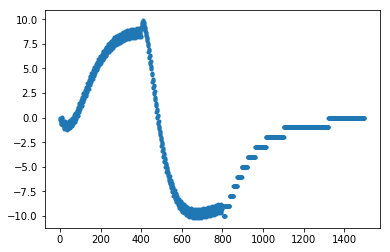

In [27]:
# difference between stimualtion and response peak
plt.plot(rpeak-speak,'.')

#plt.ylim([0,15])
#plt.xlim([350,450])

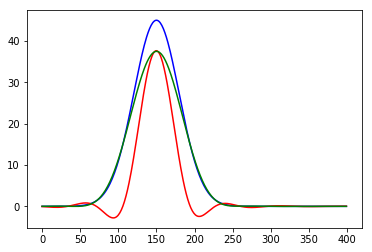

In [28]:
# spatial distribution of cells at final state
plt.plot(rs,'b') # stimualtion
plt.plot(y,'r')  # cone cell
plt.plot(z,'g')  # horizontal cell


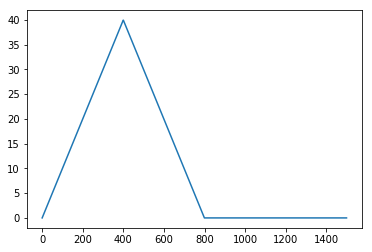

In [29]:
# distance travelled
plt.plot(speak-pos_0)

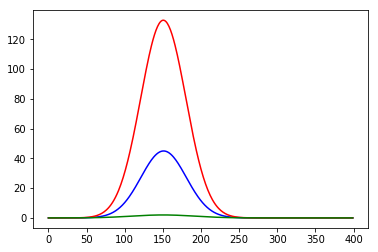

In [30]:
# snapshot at different time
index=10 # large response; weak feedback
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

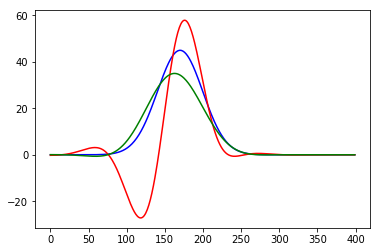

In [31]:
# snapshot at different time
index=200 # steady state, strong feedback
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

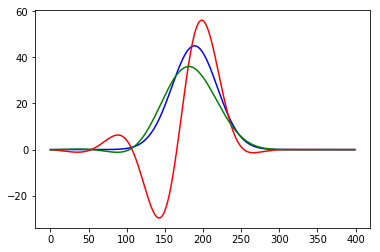

In [32]:
# snapshot at different time
index=410 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

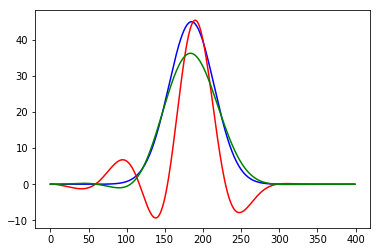

In [33]:
# snapshot at different time
index=450 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

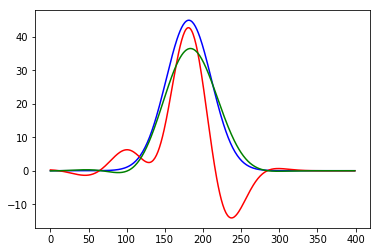

In [34]:
# snapshot at different time
index=485 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

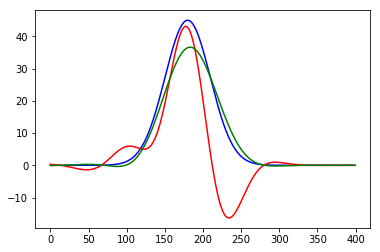

In [35]:
# snapshot at different time
index=500 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

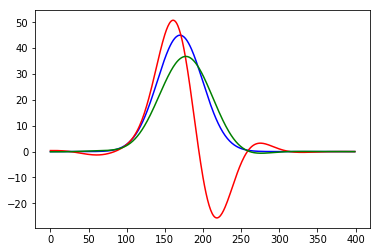

In [36]:
# snapshot at different time
index=600 # reverse direction
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

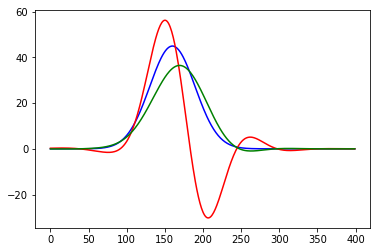

In [37]:
# snapshot at different time
index=700 # reverse direction, steady state
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

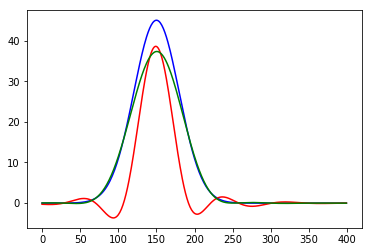

In [38]:
# snapshot at different time
index=1199 # almost stopped
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')

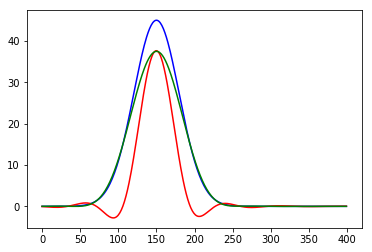

In [40]:
# snapshot at different time
index=1499 # stopped
plt.plot(stm[index],'b')
plt.plot(rsp[index],'r')
plt.plot(zts[index],'g')